In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd   'Progetto Covid Gruppo Horror'/

%ls

In [8]:
#import dei file interessati
df_province = pd.read_csv("Regioni_clean_venerdì_2.csv",sep=";")
df_comuni = pd.read_csv("comuni_clean.csv",sep=";")

In [9]:
# Creo tre dataframe per analizzare i diversi range di abitanti per la popolazione
df_comuni_meno_10000 = df_comuni[df_comuni['Popolazione2011'] < 10000]
df_comuni_tra_10000_50000 = df_comuni[(df_comuni['Popolazione2011'] >= 10000) & (df_comuni['Popolazione2011'] <= 50000)]
df_comuni_piu_50000 = df_comuni[df_comuni['Popolazione2011'] > 50000]

In [10]:
# Calcolo l'incidenza del COVID-19 per ogni scaglione con comuni meno di 10000 abitanti
df_covid_comuni_meno_10000 = df_province[df_province['RegionName'].isin(df_comuni_meno_10000['Regione'])]
df_incidenza_meno_10000 = df_covid_comuni_meno_10000.groupby('RegionName')['TotalPositiveCases'].sum() / df_comuni_meno_10000.groupby('Regione')['Popolazione2011'].sum() * 100
df_incidenza_meno_10000_sorted = df_incidenza_meno_10000.sort_values(ascending=False)

In [11]:
# Calcolo l'incidenza del COVID-19 per ogni scaglione con comuni tra i 10000 e 50000 abitanti
df_covid_comuni_tra_10000_50000 = df_province[df_province['RegionName'].isin(df_comuni_tra_10000_50000['Regione'])]
df_incidenza_tra_10000_50000 = df_covid_comuni_tra_10000_50000.groupby('RegionName')['TotalPositiveCases'].sum() / df_comuni_tra_10000_50000.groupby('Regione')['Popolazione2011'].sum() * 100
df_incidenza_tra_10000_50000_sorted = df_incidenza_tra_10000_50000.sort_values(ascending=False)

In [12]:
# Calcolo l'incidenza del COVID-19 per ogni scaglione con comuni con più di 50000 abitanti
df_covid_comuni_piu_50000 = df_province[df_province['RegionName'].isin(df_comuni_piu_50000['Regione'])]
df_incidenza_piu_50000 = df_covid_comuni_piu_50000.groupby('RegionName')['TotalPositiveCases'].sum() / df_comuni_piu_50000.groupby('Regione')['Popolazione2011'].sum() * 100
df_incidenza_piu_50000_sorted = df_incidenza_piu_50000.sort_values(ascending=False)

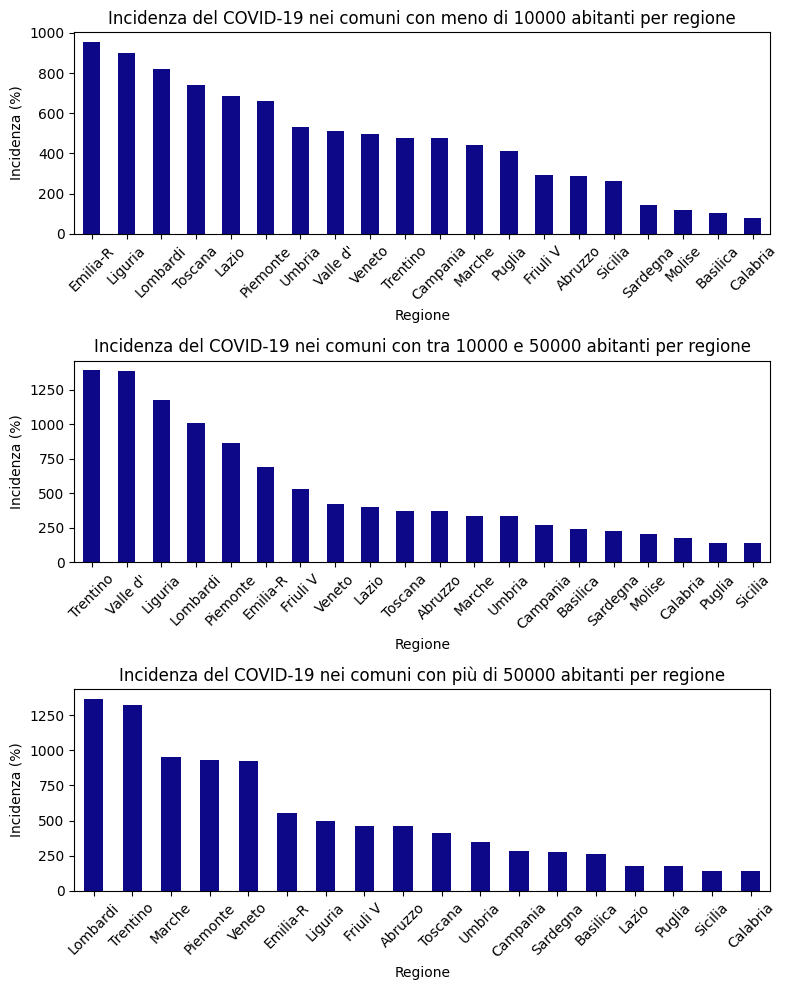

In [13]:
# Creo i grafici per ogni scaglione
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

ax1 = df_incidenza_meno_10000_sorted.plot(kind='bar', colormap='plasma', ax=axes[0])
ax1.set_xlabel('Regione')
ax1.set_ylabel('Incidenza (%)')
ax1.set_title('Incidenza del COVID-19 nei comuni con meno di 10000 abitanti per regione')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xticklabels([label.get_text()[:8] for label in ax1.get_xticklabels()])


ax2 = df_incidenza_tra_10000_50000_sorted.plot(kind='bar', colormap='plasma', ax=axes[1])
ax2.set_xlabel('Regione')
ax2.set_ylabel('Incidenza (%)')
ax2.set_title('Incidenza del COVID-19 nei comuni con tra 10000 e 50000 abitanti per regione')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_xticklabels([label.get_text()[:8] for label in ax2.get_xticklabels()])


ax3 = df_incidenza_piu_50000_sorted.plot(kind='bar', colormap='plasma', ax=axes[2])
ax3.set_xlabel('Regione')
ax3.set_ylabel('Incidenza (%)')
ax3.set_title('Incidenza del COVID-19 nei comuni con più di 50000 abitanti per regione')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_xticklabels([label.get_text()[:8] for label in ax3.get_xticklabels()])

plt.savefig('Incidenza_Covid_nei_comuni_suddivisi_in_tre_fasce.png', dpi=200)
plt.tight_layout()
plt.show()